In [31]:
from random import *
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

In [11]:

def gaussienne(mu, sigma) :
    rng = np.random.default_rng()
    a=rng.normal()
    return(mu+sigma*a)



3.348042010460763

In [41]:
def metropolis(f, k, xo, sigma, taux_acceptation=False):
    L = [xo]
    nombre_acceptations = 0
    
    t = 0
    while t < k:
        x = L[-1]
        y = np.random.normal(x, sigma)
        alpha = f(y) / f(x)

        u = np.random.rand()
        if u <= alpha:
            L.append(y)
            nombre_acceptations += 1
        else:
            L.append(x)  
        t += 1
    
    if taux_acceptation:
        taux = nombre_acceptations / k
        return L, taux
    else:
        return L




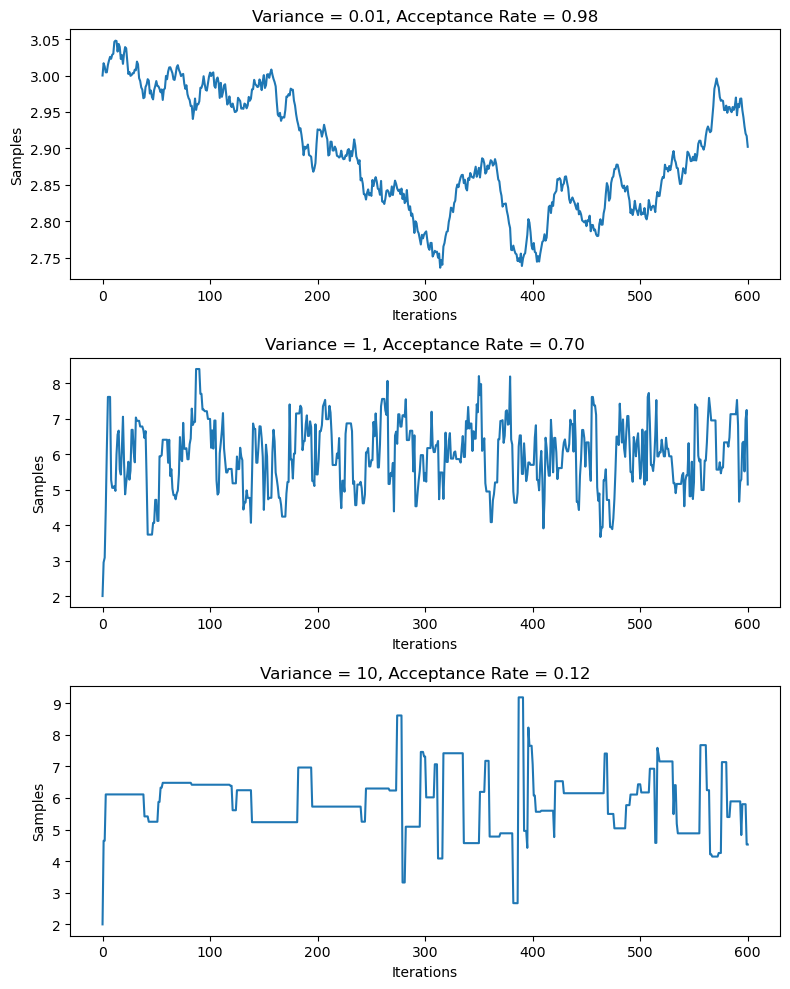

In [60]:
#Choix de la variance dans le processus de transition

def f(x):
    return sc.stats.norm.pdf(x, 6, 1)

# Simulations avec différentes valeurs de variance
np.random.seed(7)
L1, taux1 = metropolis(f, 600, 3, 0.01, taux_acceptation=True)
L2, taux2 = metropolis(f, 600, 2, 1, taux_acceptation=True)
L3, taux3 = metropolis(f, 600, 2, 10, taux_acceptation=True)

# Affichage des résultats
fig, axs = plt.subplots(3, figsize=(8, 10))

T1 = [k for k in range(len(L1))]
axs[0].plot(T1, L1)
axs[0].set_title(f'Variance = 0.01, Acceptance Rate = {taux1:.2f}')
axs[0].set_xlabel('Iterations')
axs[0].set_ylabel('Samples')

T2 = [k for k in range(len(L2))]
axs[1].plot(T2, L2)
axs[1].set_title(f'Variance = 1, Acceptance Rate = {taux2:.2f}')
axs[1].set_xlabel('Iterations')
axs[1].set_ylabel('Samples')

T3 = [k for k in range(len(L3))]
axs[2].plot(T3, L3)
axs[2].set_title(f'Variance = 10, Acceptance Rate = {taux3:.2f}')
axs[2].set_xlabel('Iterations')
axs[2].set_ylabel('Samples')

plt.tight_layout()
plt.show()


Lorsque nous examinons les graphiques générés par l'algorithme Metropolis-Hastings avec différentes valeurs de variance, plusieurs observations se dégagent. Pour la première série de données, avec une variance de 0.01, le graphique semble être trop régulier, ne présentant pas les caractéristiques attendues d'une chaîne de Markov. Cela suggère que la variation introduite par le processus de transition est trop faible pour explorer efficacement l'espace des échantillons.

En revanche, dans le deuxième graphique, où la variance est fixée à 1, nous observons une amélioration significative. Les fluctuations semblent plus aléatoires, ce qui indique une exploration plus efficace de l'espace des échantillons. Cela est cohérent avec un taux d'acceptation raisonnable, où de nouveaux candidats sont acceptés plus fréquemment, enrichissant ainsi la diversité des échantillons générés.

Cependant, lorsque la variance est élevée, comme dans le troisième graphique où elle est de 100, nous constatons un phénomène intéressant. Le taux d'acceptation devient très faible, ce qui se traduit par de longs paliers dans le graphique. Cela signifie que la plupart du temps, aucun nouveau candidat n'est accepté dans la boucle de Metropolis-Hastings, et l'algorithme conserve simplement l'échantillon précédent. Cette exploration inefficace de l'espace des échantillons limite la capacité de l'algorithme à générer une représentation fidèle de la distribution cible.

En conclusion, la variance de 1 semble offrir le meilleur compromis entre exploration efficace de l'espace des échantillons et taux d'acceptation raisonnable. Nous choisirons donc cette valeur pour nos simulations futures.

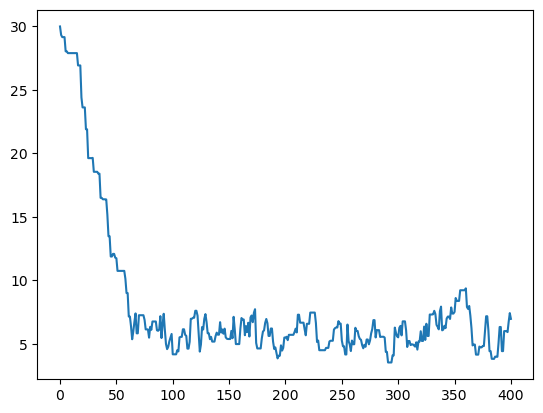

In [64]:
#Influence de xO dans Metropolis Hastings

L4, taux4 = metropolis(f, 400, 30, 1, taux_acceptation=True)
T4 = [k for k in range(len(L4))]

plt.plot(T4,L4)
plt.show()

Lorsque le point initial choisi pour l'algorithme Metropolis-Hastings est situé loin de la moyenne de la distribution cible, cela peut entraîner une phase de transition. 
Pendant cette période de transition, le graphe généré par l'algorithme peut présenter une allure très régulière. 
Cette régularité est le résultat de l'effort de l'algorithme pour ajuster les échantillons vers des valeurs plus représentatives de la distribution cible.
Cette phase initiale peut entraîner une mauvaise approximation de la variable aléatoire cible, car les échantillons générés sont concentrés dans des zones de faible densité de probabilité.


Mean of the histogram for Chi^2: 4.987395893720851
Mean of the true distribution for Chi^2: 5.0
Mean of the histogram for Gaussian distribution: 4.007762279384852
Mean of the true distribution for Gaussian distribution: 4.0


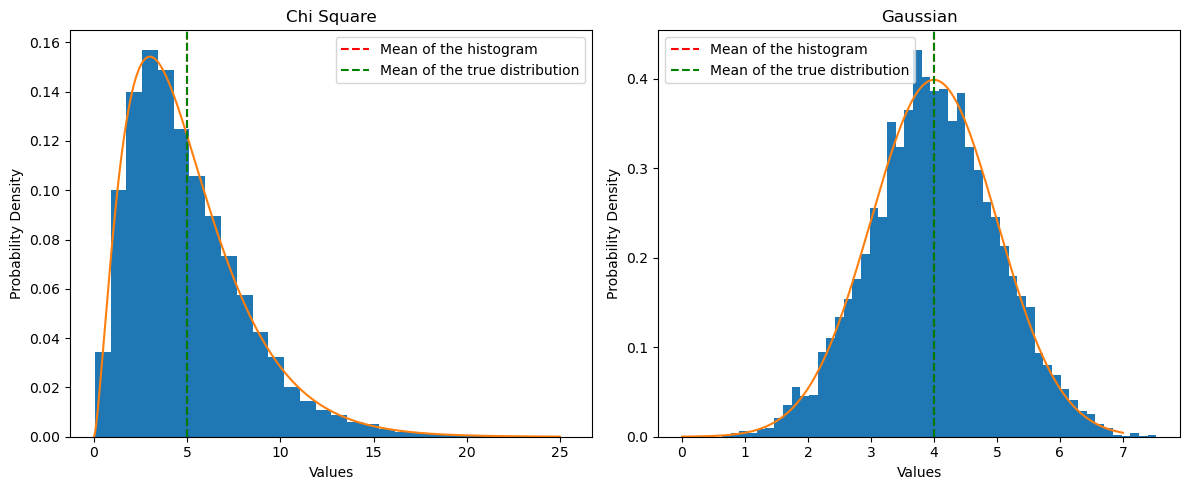

In [17]:

# Définition des fonctions f et g, respectivement les densités d'un chi 2 de paramètre 5 et d'une gaussienne centrée, réduite.
def f(x):
    return sc.stats.chi2.pdf(x, 5)

def g(x):
    return sc.stats.norm.pdf(x, 4, 1)


# Premier graphique
T = np.linspace(0, 25, 3000)
Y = np.array([f(k) for k in T])
L = metropolis(f, 60000, 5,1)
M = [L[k] for k in range(0, 60000, 10)]

# Calcul des moyennes
mean_hist_chi2 = np.mean(M)
mean_true_chi2 = sc.stats.chi2.mean(5)


print("Mean of the histogram for Chi^2:", mean_hist_chi2)
print("Mean of the true distribution for Chi^2:", mean_true_chi2)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Graphique 1
axes[0].hist(L, bins=30, density=True)
axes[0].plot(T, Y)
axes[0].axvline(mean_hist_chi2, color='r', linestyle='--', label='Mean of the histogram')
axes[0].axvline(mean_true_chi2, color='g', linestyle='--', label='Mean of the true distribution')
axes[0].set_title('Chi Square')
axes[0].set_xlabel('Values')
axes[0].set_ylabel('Probability Density')
axes[0].legend()

# Deuxième graphique
P = metropolis(g, 60000, 1,1)
U = [P[t] for t in range(0, 60000, 10)]
# Calcul des moyennes
mean_hist_norm = np.mean(U)
mean_true_norm = sc.stats.norm.mean(4, 1)

# Affichage des moyennes avec print
print("Mean of the histogram for Gaussian distribution:", mean_hist_norm)
print("Mean of the true distribution for Gaussian distribution:", mean_true_norm)

axes[1].hist(U, bins=50, density=True)
T2 = np.linspace(0, 7, 8000)
Y2 = np.array([sc.stats.norm.pdf(t, 4, 1) for t in T2])
axes[1].plot(T2, Y2)
axes[1].axvline(mean_hist_norm, color='r', linestyle='--', label='Mean of the histogram')
axes[1].axvline(mean_true_norm, color='g', linestyle='--', label='Mean of the true distribution')
axes[1].set_title('Gaussian')
axes[1].set_xlabel('Values')
axes[1].set_ylabel('Probability Density')
axes[1].legend()

plt.tight_layout()
plt.show()
